In [4]:
using Plots
gr(size=(600,400))

Plots.GRBackend()

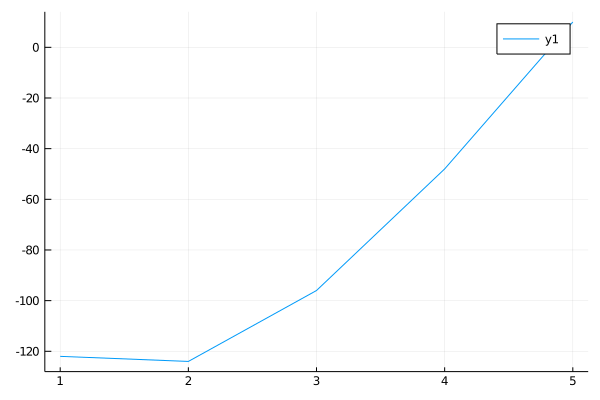

In [17]:
f(x) = 10 * (4 - x)
A = [-1  1  0  0  0;
      1 -2  1  0  0;
      0  1 -2  1  0;
      0  0  1 -2  1;
      0  0  0  0  1]
b = [-2; f(1); f(2); f(3); 10]

v = A \ b
plot(v)

In [18]:
function exemplo1(n)
    h = (4 - 0) / (n - 1)

    A = zeros(n, n)
    b = zeros(n)

    # 1a linha
    A[1,1] = -1.0
    A[1,2] = 1.0
    b[1] = -2h

    # n-ésima linha
    A[n,n] = 1
    b[n] = 10.0

    for i = 2:n-1
        xi = 0 + (i - 1) * h
        A[i,i-1] = 1.0
        A[i,i] = -2.0
        A[i,i+1] = 1.0
        b[i] = f(xi) * h^2
    end

    v = A \ b
end

exemplo1 (generic function with 1 method)

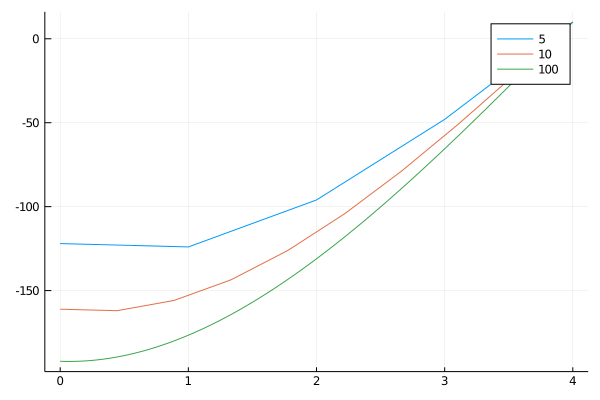

In [19]:
plot()
for n = [5, 10, 100]
    plot!(range(0, 4, length=n), exemplo1(n), lab="$n")
end
plot!()

In [20]:
function exemplo2(n)
    h = (4 - 0) / (n - 1)

    A = zeros(n, n)
    b = zeros(n)

    # 1a linha
    A[1,1] = -2.0
    A[1,2] = 2.0
    b[1] = h^2 * f(0) - 4h

    # n-ésima linha
    A[n,n] = 1
    b[n] = 10.0

    for i = 2:n-1
        xi = 0 + (i - 1) * h
        A[i,i-1] = 1.0
        A[i,i] = -2.0
        A[i,i+1] = 1.0
        b[i] = f(xi) * h^2
    end

    v = A \ b
end

exemplo2 (generic function with 1 method)

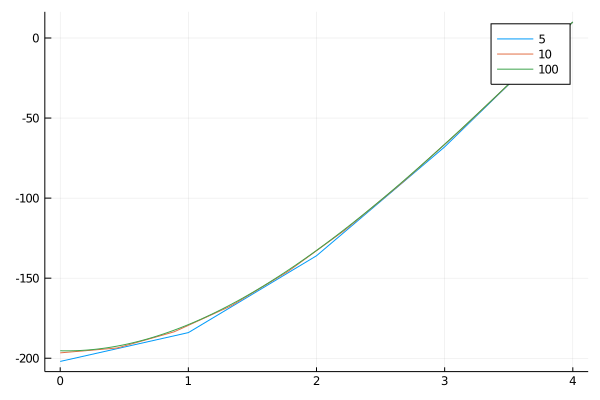

In [21]:
plot()
for n = [5, 10, 100]
    plot!(range(0, 4, length=n), exemplo2(n), lab="$n")
end
plot!()